In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate
import seaborn as sns
import pandas as pd
import numpy as np
import math

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [75]:
insurance = pd.read_csv("insurance_data.csv")
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

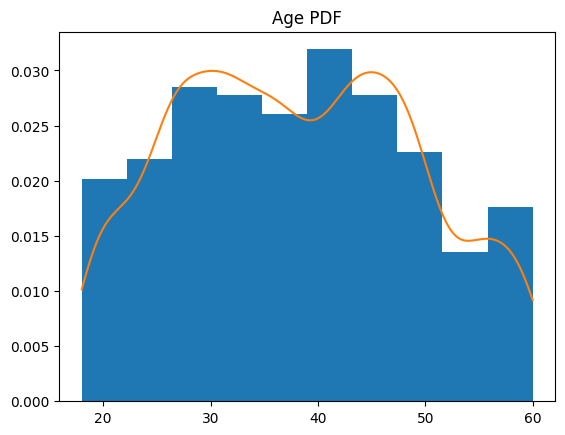

In [76]:
# Code Here


# Load Data
df = insurance


# Plot Age Histogram
plt.hist(df['age'], density=True)


# Fit KDE to Age Data
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(df['age'].dropna().to_numpy().reshape(-1,1))


# Evaluate PDF over age Range
age_range = np.linspace(df['age'].min(), df['age'].max(), 1000)
pdf = np.exp(kde.score_samples(age_range.reshape(-1,1)))


# Plot PDF
plt.plot(age_range, pdf)
plt.title('Age PDF')
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [77]:
# Code Here

bmi_over_30 = df[df['bmi'] > 30]

prob_bmi_over_30 = len(bmi_over_30) / len(df)

print(round(prob_bmi_over_30, 2))

0.52


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

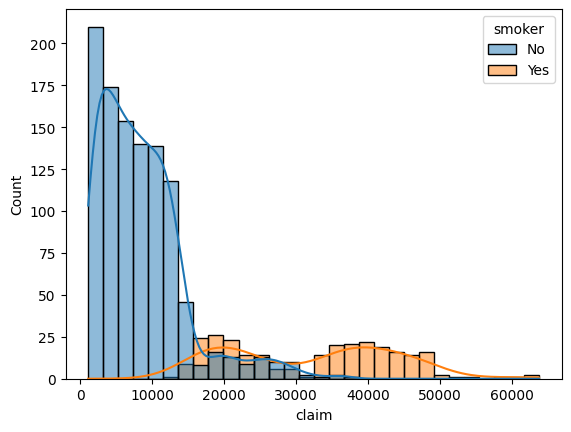

In [78]:
# Code Here

sns.histplot(df, x='claim', kde=True, hue='smoker')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<Axes: xlabel='age', ylabel='claim'>

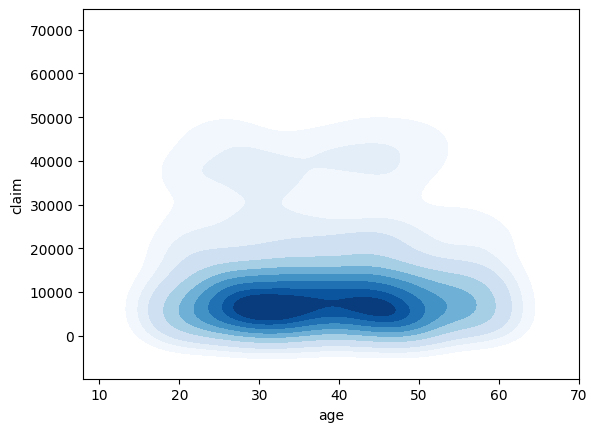

In [79]:
# Code Here

sns.kdeplot(x=df['age'], y=df['claim'], cmap='Blues', thresh=0.05, fill=True)

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

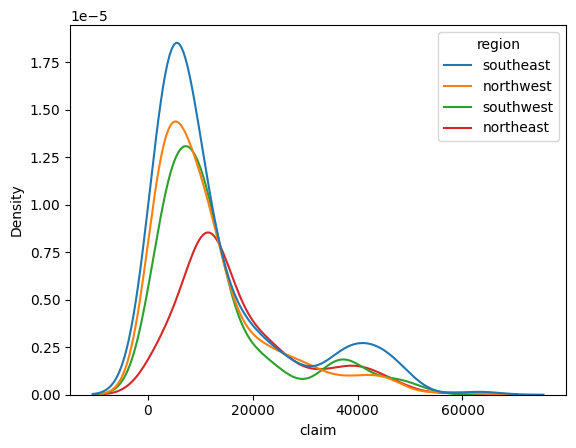

In [80]:
# Code Here

sns.kdeplot(df, x='claim', hue='region')

### Q6: Plot PDF and CDF of claim in insurance data

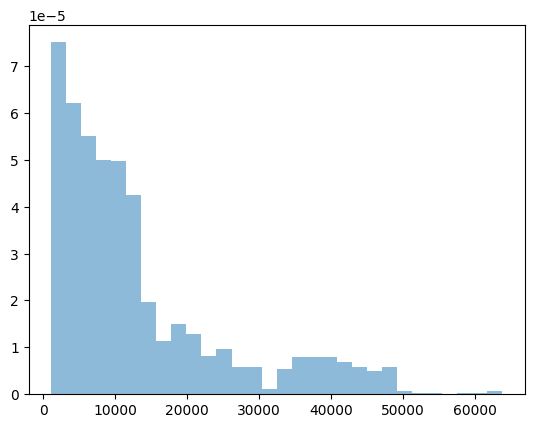

In [81]:
# Code Here


# Approach 1 - Histogram approach to which distribution follows 
plt.hist(df['claim'], bins=30, density=True, alpha=0.5)
plt.show()

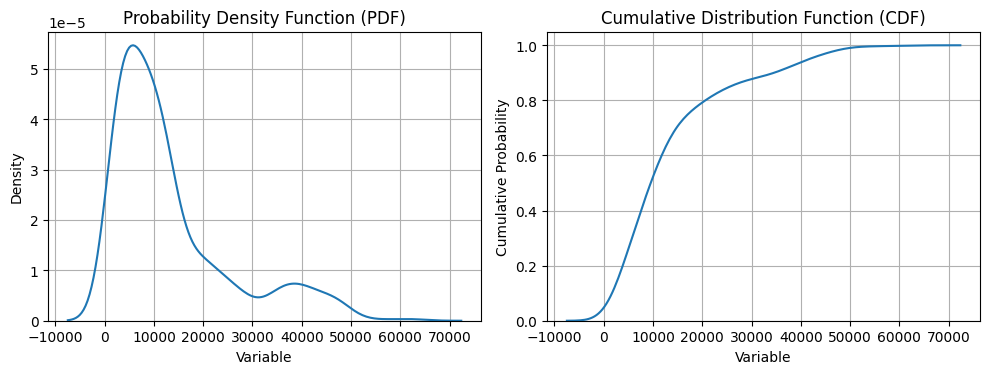

In [82]:
# Approach 2 - HNon Parametric Approach
plt.figure(figsize=(10,4))

# Plot PDF using KDE
plt.subplot(1,2,1)
sns.kdeplot(df['claim'])
plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF)')
plt.grid(True)

# Plot CDF using Cumulative Sum of KDE
plt.subplot(1,2,2)
sns.kdeplot(df['claim'], cumulative=True)
plt.xlabel('Variable')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)

# Adjust Layout and Display the Plots
plt.tight_layout()
plt.show()

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

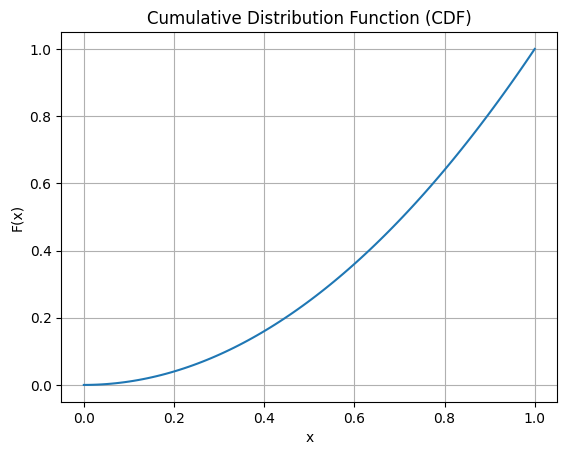

Probability that X is greater than 0.5: 0.75


In [83]:
# Code Here

# Define the Probability Density Function (PDF)
def pdf(x):
    if 0 <= x <= 1:
        return 2*x
    else:
        return 0

# Define the Cumulative Distribution Function (CDF)
def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x ** 2
    else:
        return 1

# Generate a range of x values from 0 to 1
x = np.linspace(0, 1, 100)

# Calculate the corresponding CDF values
y_cdf = np.array([cdf(xi) for xi in x])


# Plot CDF 
plt.plot(x, y_cdf)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()

prob_x_greater_than = 1 - cdf(0.5)
print("Probability that X is greater than 0.5:", prob_x_greater_than)

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

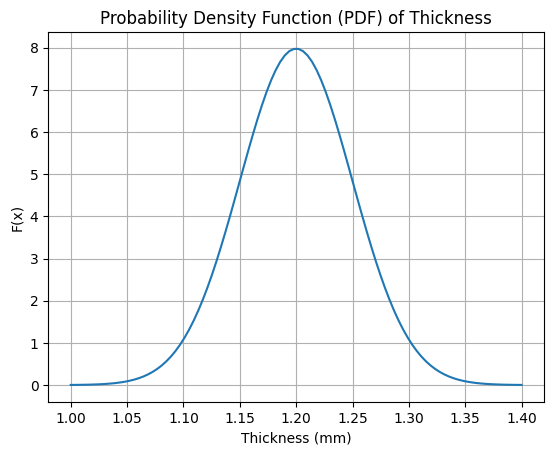

Probability that the thickness is between 1.1 mm and 1.3 mm: 0.9544997361036409


In [84]:
# Code Here

# Define the parameters of the normal distribution
mean = 1.2
std = 0.05

# Define the Probability Density Function (PDF) for Normal Distribution
def pdf(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Generate a range of x values from 1.0 mm to 1.4 mm
x = np.linspace(1.0, 1.4, 100)

# Calculate the corresponding PDF Values
y_pdf = pdf(x, mean, std)

# Plot the PDF
plt.plot(x, y_pdf)
plt.xlabel('Thickness (mm)')
plt.ylabel('F(x)')
plt.title('Probability Density Function (PDF) of Thickness')
plt.grid(True)
plt.show()

# Calculate the probability that the thickness is between 1.1 mm and 1.3 mm
lower_bound = 1.1
upper_bound = 1.3
prob_between_1_1_and_1_3 = integrate.quad(lambda x : pdf(x, mean, std), lower_bound, upper_bound)[0]
print("Probability that the thickness is between 1.1 mm and 1.3 mm:", prob_between_1_1_and_1_3)

In [85]:
# Define the CDF Function for Normal Distribution
def cdf(x, mean, std):
    return (1 + math.erf((x - mean) / (std * np.sqrt(2)))) / 2

cdf(1.3, mean, std) - cdf(1.1, mean, std)

0.9544997361036414

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

Best Bandwidth: 4.5348785081285845


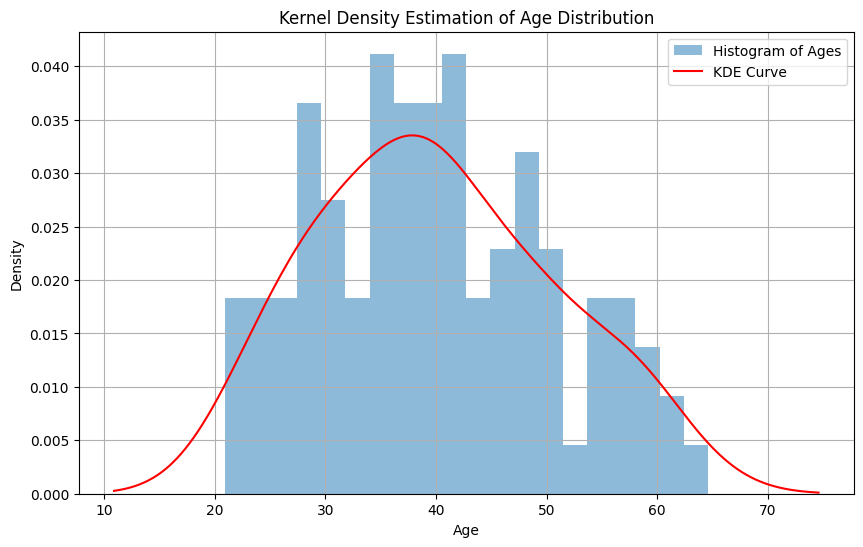

In [86]:
# Code Here


# Generate a Sample of 100 Ages
ages = np.random.normal(loc=40, scale=10, size=100)


# Define the range of Bandwidths to Test
bandwidths = 10 ** np.linspace(-1, 1, 100)

# Define the parameters for the KDE
params = {
    'bandwidth': bandwidths,
    'kernel': ['gaussian']
}

# Create a GridSearchCV object to find the best Bandwidth
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(ages.reshape(-1, 1))

# Extract the best Bandwidth from the GridSearchCV Object
best_kde = grid.best_estimator_
print('Best Bandwidth:', best_kde.bandwidth)


# Evaluate KDE on a range of values
x_plot = np.linspace(min(ages) - 10, max(ages) + 10, 1000)[:, np.newaxis]
log_dens = best_kde.score_samples(x_plot)
dens = np.exp(log_dens)

# Plot Histogram and KDE Curve
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, density=True, alpha=0.5, label='Histogram of Ages')
plt.plot(x_plot[:, 0], dens, color='red', label='KDE Curve')
plt.title('Kernel Density Estimation of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Scott Rule Bandwidth
h = 1.06 * 10 * (100**(-1/5))
print("Scott Rule Bandwidth:", h)

Scott Rule Bandwidth: 4.219936007867071
